# Milestone 1 Assignment - Independent Project
## Author - Kaza Razat

### Introduction
You have been asked to provide data analysis on a text dataset composed from articles, summaries and user reviews on video games. The project manager asks you to conduct exploratory data analysis on the dataset to determine if it's going to be suitable for use in their machine learning products. She wants to know if there are relationships that could help validate the sentiment values or the typology classifications.


### Problem Statements
- Identify any relationships between the grammar lengths, the typology classification and the sentiment
- Is this dataset going to be viable for future training based on the exploratory analysis
- A higher quantity of SVO class sentences is expected, does the analysis of the dataset validate this

### About the dataset
We will use a dataset created from blocks of text that features the number of nouns and verbs in the sentence (integers), the typology of the sentence (categorical), the sentiment score of the sentence (floats) and the length of the sentence (ints). 

#### GitHub Dataset Project
This repo was created and used to create a dataset with NLP features. My interest lies in applying data science techniques to understanding and extracting insights from text data so I will be expanding on the features in the dataset based on the results of the EDA as the independent project progresses.<br>
https://github.com/kazarazat/datasetify

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset location
fileName = "https://raw.githubusercontent.com/kazarazat/datasetify/master/csvs/summary-nlp-data.csv"


In [3]:
# Create a dataFrame from the CSV
game_text = pd.read_csv(fileName)

### Summary Statistics

In [4]:
print ("data shape:",game_text.shape)
game_text.describe()

data shape: (3392, 5)


,WordCount,Nouns,Verbs,Sentiment
count,3392.000000,3392.000000,3392.000000,3392.000000
mean,29.771816,9.927771,4.384434,0.026004
std,18.174466,6.450988,2.967170,0.211652
min,1.000000,0.000000,0.000000,-1.000000
25%,18.000000,6.000000,2.000000,-0.066700
50%,25.000000,8.000000,4.000000,0.000000
75%,37.000000,13.000000,6.000000,0.129400
max,259.000000,91.000000,26.000000,1.000000


In [5]:
game_text.head(10)

,WordCount,Nouns,Verbs,Typology,Sentiment
0,17,8,2,SOV,-0.4000
1,29,12,4,SOV,-0.2000
2,28,8,5,SVO,0.0000
3,15,4,2,SOV,0.0000
4,77,26,7,SOV,0.0385
5,20,8,4,SOV,0.0000
6,12,3,0,SVO,0.1250
7,35,13,2,SOV,0.1389
8,10,3,2,SOV,0.0000
9,32,15,1,SOV,-0.1250


In [6]:
# Check for missing values in the dataset
game_text.isnull()

,WordCount,Nouns,Verbs,Typology,Sentiment
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3387,False,False,False,False,False
3388,False,False,False,False,False
3389,False,False,False,False,False
3390,False,False,False,False,False


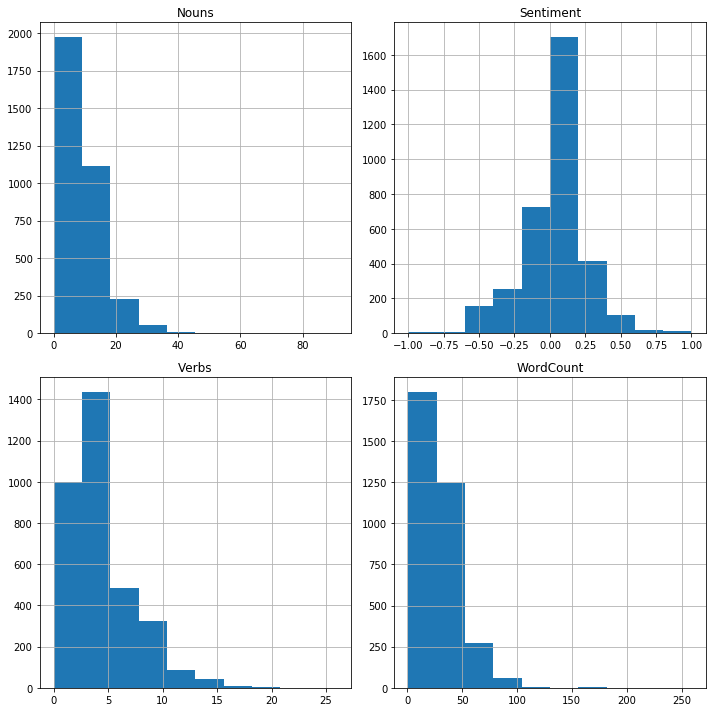

In [7]:
# Show histograms of the columns with numeric values
ax = game_text.loc[:, game_text.columns.difference(['Typology'])].hist(bins=10,figsize=(10, 10)) 
plt.tight_layout()

### Outliers in Text Data
The Word Count column shows a decent amount of sentences had words counts approaching 100 words. We have to be careful to treat these rows as outliers because it is possible that for whatever reasons a sentence runs on for several hundred words. We would neither impute these rows nor remove them without going back to the original text corpus to see if they are in fact long sentences or if they were processed incorrectly. Also because of the nature and personal preference of writing styles, it is very diffuclt to determine means and medians where text data are concerned.

### Correlation plots
As a starting point to help indentity what possible value relationships to explore we have a function to plot a heatmap of all the numerical values in the dataset. This function can later be expanded to exclude values as well.

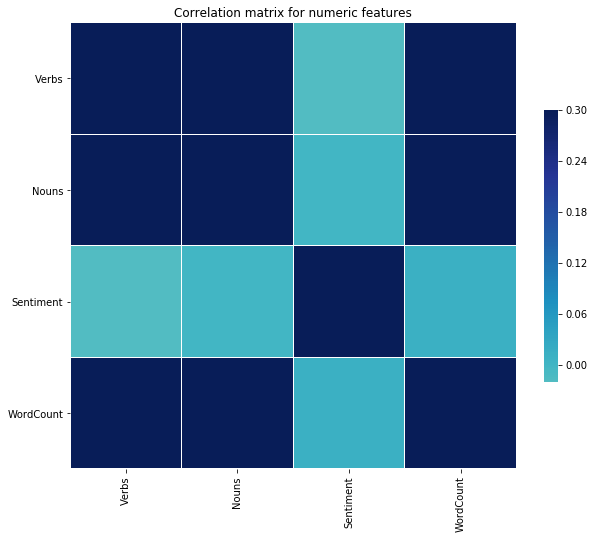

In [8]:
# A function to plot of a heatmap of the correlation of data numerical values
def corr_heatmap(values_list):
    vals_corr = game_text[values_list].corr()
    plt.subplots(figsize=(10,10))
    sns.color_palette("BuGn_r")
    sns.heatmap(vals_corr, vmax=.3, center=0,cmap="YlGnBu",
                square=True, linewidths=.25, cbar_kws={"shrink": .5})
    plt.title('Correlation matrix for numeric features')
    plt.yticks(rotation='horizontal')
    plt.xticks(rotation='vertical')
    return
corr_heatmap(['Verbs',"Nouns","Sentiment","WordCount"])

### Observation 1
The quantity of verbs and nouns in a sentence don't appear to be correlated with the sentiment score of the sentence. This would validate domain knowledge of how sentiment analysis is processed on text by vector representation of words and by word orders to account for grammatical negations. We would expect verb and noun counts to have correlation with word count because they are subsets. We also don't see any correlation here or word count to sentiment.

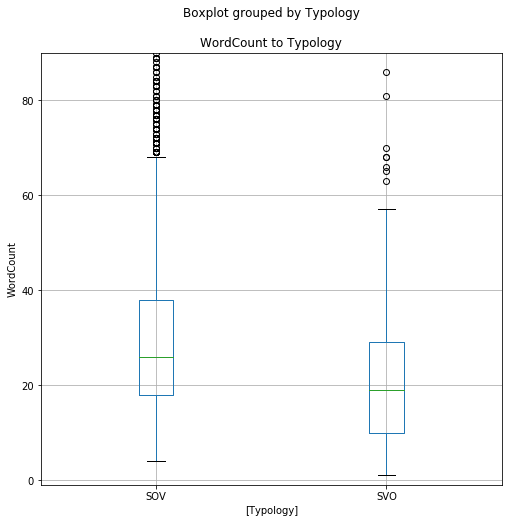

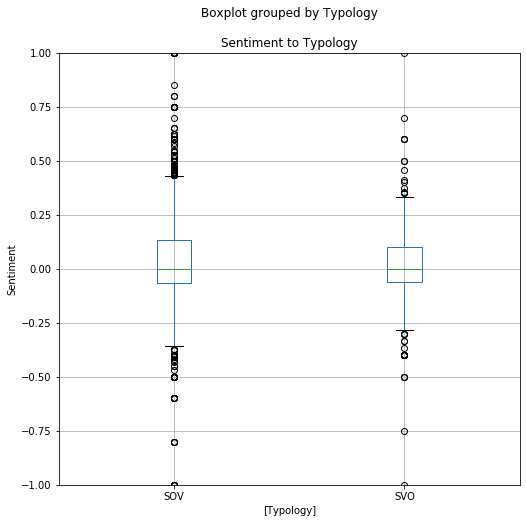

In [9]:
def group_boxplot(category_name,vals_name,y_min,y_max):
    fig = plt.figure(figsize=(8, 8)) # Define plot area
    ax = fig.gca() # Define axis 
    game_text.loc[:,[vals_name,category_name]].boxplot(by = category_name, ax = ax)
    ax.set_title('{} to {}'.format(vals_name,category_name)) # Give the plot a main title
    ax.set_ylabel(vals_name)# Set text for y axis
    ax.set_ylim(y_min, y_max) # Set the limits of the y axis
    return
group_boxplot("Typology","WordCount",-1.0,90.0)
group_boxplot("Typology","Sentiment",-1.0,1.0)

### Observation 2
There appears to be a relationship with the word count of a sentence and the typological structure of it's subject, verb and object order(SVO). There are several outlier sentences exceeding the average number of words as well. The boxplot of Sentiment to typology however appears to show less difference between the two different typology categories.

### Note on Text Data
Human generated text may not adhear to established distribution patterns like other types of data. To test this hypothesis lets apply the *Central Limit Theorum* (mean of samples) to the Word Counts and see if we observe less outliers and a smoother distribution.

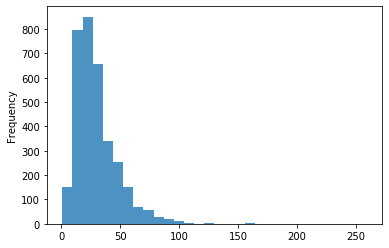

In [10]:
# A histogram of the Word Count
ax = game_text['WordCount'].plot.hist(bins=30, alpha=0.8)

In [11]:
# Create a function slice the data into the mean of sample groups of 10
def get_sample_means(column):
    """
    Takes a values column
    Creates sample mean groups of 10
    Plots the sample means
    """
    from numpy import mean
    from itertools import islice
    
    col_list = column.tolist()
    in_list = iter(col_list)
    split_len = [10]
    
    #create an array of slices by 10 of the input array
    out_list = [list(islice(in_list, elem)) 
                  for elem in split_len][0] 
    
    # get the mean of the 10 or less items in each list
    sample_means = [mean(item) for item in out_list]
    sample_df = pd.DataFrame({"SampleMeans":sample_means})
    return sample_df

wc_sample_means = get_sample_means(game_text['WordCount'])

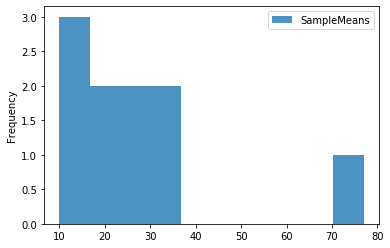

In [12]:
# A histogram of the sample means of Word Count
wc_sample_means.plot.hist(alpha=0.8)

The distribution of the sample means while having less outliers still don't appear to follow normal distribution patterns. Perhaps with a larger sample size we might see CLT better play out or it might be the case that text data doesn't easily adhere to gaussian distribution given sentence lengths. 

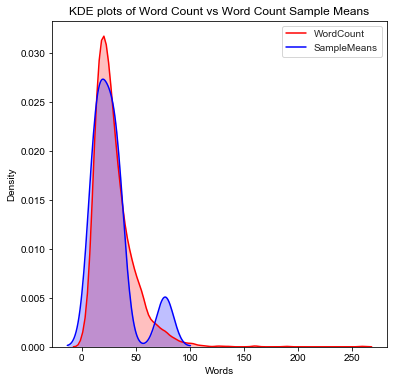

In [13]:
def kde_overlay():
    fig = plt.figure(figsize=(6,6)) # Define plot area
    ax = fig.gca() # Define axis 
    sns.set_style("whitegrid")
    ax = sns.kdeplot(game_text['WordCount'], shade=True, color="r")
    ax = sns.kdeplot(wc_sample_means['SampleMeans'], shade=True, color="b") #wc_sample_means
    ax.set_title('KDE plots of Word Count vs Word Count Sample Means')
    ax.set_xlabel('Words')
    ax.set_ylabel('Density')
    return

kde_overlay()

Looking at the graph above it appears that the long tail of word count outliers had a measurable impact on the sample means.

### Dataset Pair Plots
Among the interesting things this pair plot shows is the:
- A balanced distribution of sentiment scores where the average score is 0.0 or Neutral
- The relatively consistant linear relationship between sentiment and grammatical counts
- The SOV class sentences appear to be the outliers which is consistant with linguistic patterns

<Figure size 576x576 with 0 Axes>

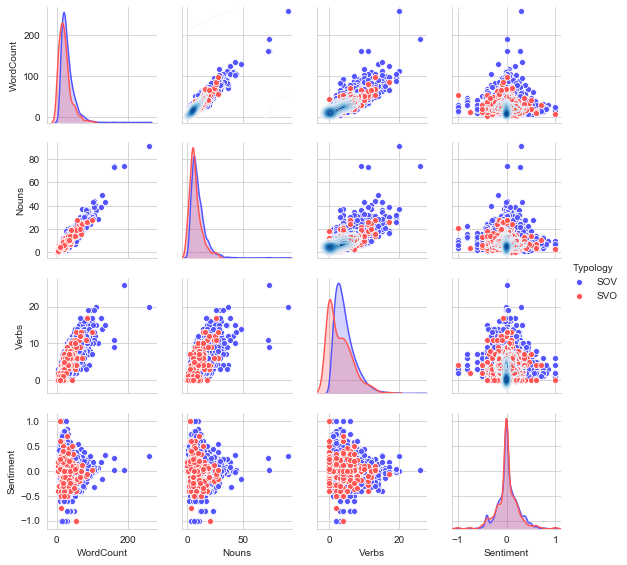

In [14]:
def pairplot(dataframe,hue_):
    num_cols = dataframe.columns.tolist() 
    fig = plt.figure(figsize=(8, 8)) # Define plot area
    ax = sns.pairplot(game_text.loc[:, num_cols], hue=hue_, 
                 palette="seismic", diag_kind="kde", 
                 height=2).map_upper(sns.kdeplot, cmap="Blues")
    return

pairplot(game_text,'Typology')

### Data Transformations
Starting with a pivot table we're going to transform the dataset and create a new<br>
categorical attribute from the Sentiment values because their wide range from 1.0 to -1.0.

In [15]:
# Create a pivot table that is a slice of the main dataset to focus on Tables that were opened
temp_game_text = game_text[['Typology','WordCount','Sentiment']]
print (temp_game_text.head(10))

  Typology  WordCount  Sentiment
0      SOV         17    -0.4000
1      SOV         29    -0.2000
2      SVO         28     0.0000
3      SOV         15     0.0000
4      SOV         77     0.0385
5      SOV         20     0.0000
6      SVO         12     0.1250
7      SOV         35     0.1389
8      SOV         10     0.0000
9      SOV         32    -0.1250


In [16]:
# Create categories for Sentiment values
desc = []
for val in temp_game_text['Sentiment'].tolist():
    if 0.4 <= val <= 1.0:
        desc.append('high')
    elif 0.00 <= val <= 0.399:
        desc.append('neutral')
    elif val < 0.001:
        desc.append('low')

In [17]:
temp_game_text['Description'] = desc
print (temp_game_text.head(10))

  Typology  WordCount  Sentiment Description
0      SOV         17    -0.4000         low
1      SOV         29    -0.2000         low
2      SVO         28     0.0000     neutral
3      SOV         15     0.0000     neutral
4      SOV         77     0.0385     neutral
5      SOV         20     0.0000     neutral
6      SVO         12     0.1250     neutral
7      SOV         35     0.1389     neutral
8      SOV         10     0.0000     neutral
9      SOV         32    -0.1250         low


In [18]:
with_description = pd.pivot_table(temp_game_text, index=['Typology',
                                                 'WordCount',
                                                 'Sentiment',
                                                 'Description'],values='WordCount', aggfunc='sum')

In [19]:
with_description.head(10)

Empty DataFrame
Columns: []
Index: [(SOV, 4, 0.0, neutral), (SOV, 5, 0.0, neutral), (SOV, 6, -0.15, low), (SOV, 6, 0.0, neutral), (SOV, 7, -0.4, low), (SOV, 7, -0.3, low), (SOV, 7, -0.2, low), (SOV, 7, 0.0, neutral), (SOV, 7, 0.1667, neutral), (SOV, 7, 0.25, neutral)]

In [20]:
with_description.tail(10)

Empty DataFrame
Columns: []
Index: [(SVO, 57, 0.0957, neutral), (SVO, 63, -0.2, low), (SVO, 65, -0.1174, low), (SVO, 66, -0.175, low), (SVO, 68, -0.0028, low), (SVO, 68, 0.0, neutral), (SVO, 70, 0.1167, neutral), (SVO, 81, -0.0997, low), (SVO, 86, -0.0667, low), (SVO, 98, 0.0181, neutral)]

### Violin Plots
With our transformed table we can now create a violin plot of Sentiment value distributions
by sentiment category across typology class.

The SVO and SOV sentences with low sentiment appear to have the most outlier sentiment values. A possible explanation<br>for this could be that the sentence's grammatical structure made an accurate sentiment analysis difficult. If this is true it would<br>mean that we cannot fully trust the sentiment scores of the dataset.

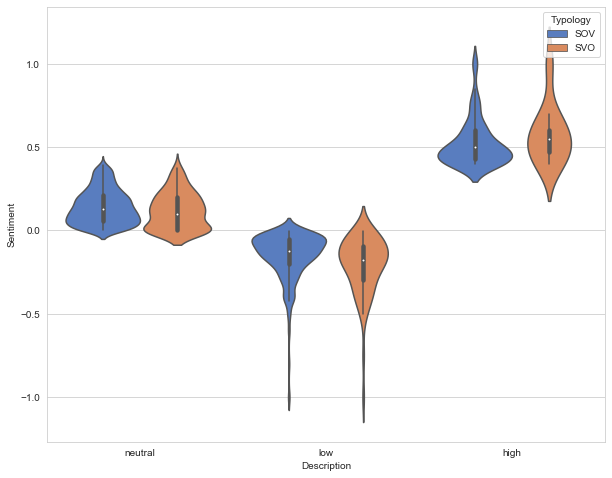

In [21]:
def violin_plot(data_):
    df = data_.reset_index()
    fig = plt.figure(figsize=(10, 8))
    ax = sns.violinplot(x="Description", y="Sentiment", hue="Typology",data=df, palette="muted")
    return

violin_plot(with_description)

### Categorical Scatter Plots
The category scatter plot is another way to see the groupings of sentences by sentiment and typology. This type of plot uses a swarm algorithm to prevent the visual displaying of overplotting of scatter points.

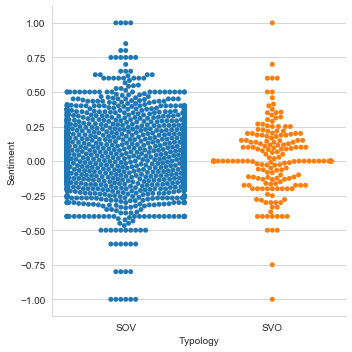

In [22]:
sns.catplot(x="Typology", y="Sentiment", kind="swarm", data=with_description.reset_index())

### Facet Grids
The facet grids are showing multivalue scatter plots by typology class. Here we can see yet again that the amount of sentences in the dataset categorized as SOV by far outnumber the SVO class sentences. According to the problem statement the opposite should be true.

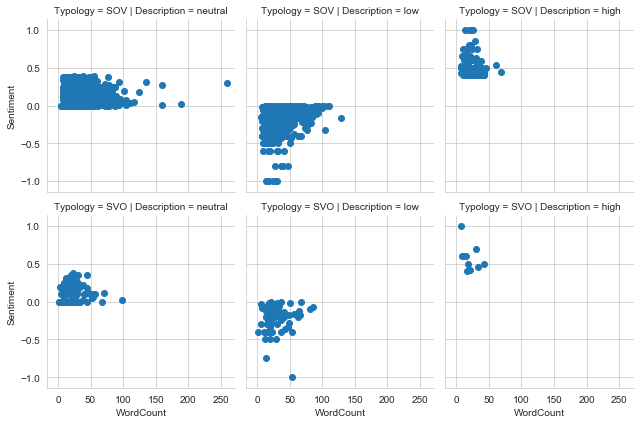

In [23]:
def facetGrid():
    t = with_description
    t.reset_index(inplace=True)
    g = sns.FacetGrid(t, 
                      col="Description", 
                      row='Typology', 
                      palette="Set1")
    g = g.map(plt.scatter, "WordCount", "Sentiment") 
    
    return plt.show()

facetGrid()

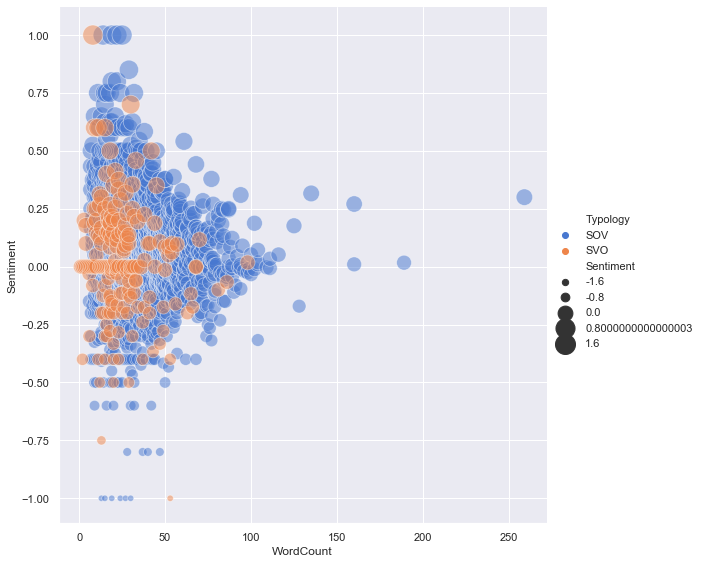

In [24]:
sns.set(color_codes=True)
sns.relplot(x="WordCount", y="Sentiment", hue="Typology", size="Sentiment",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=with_description)

### Observation 3
In english grammar properly formed sentences should follow a typology of subject, verb, object (SVO). Based on our initial EDA we can see that many of sentences with the highest sentiment scores are SOV (subject, object, verb) in structure. Linguistically these sentences are misformed according to the grammatic rules of the English language. It's possible that there is a correlation in their high sentiment scores and their irregular grammatic structure. The highest sentiment SOV sentences, the lowest sentiment SOV sentences and the sentences with irregular amounts of words could all be outliers.

### Conclusions
- The EDA appears to confirm that there are more SOV class sentences calling into the question the validity of the dataset
- There appears to be a relationship between the length of the sentence and it's typology classification
- There was no observable relationship between the word count, grammar count and sentiment
- There appears to be a substantial amount of sentences that exceed the average word count which again challenges the viability of the dataset for future use.
- There is a relationship between typology classification and word count however there are so many outliers that it is likely to change should we impute or remove the outliers from the dataset.
- The sentiment attribute values of the dataset are questionable given the unexpectedly high distribution of SOV class observations.
